# 1.

Le probleme a resoudre est la prediction du score final d'un apprenant dans une formation en ligne. Pour ce faire, je vais créer un modèle de prévision pour prédire si un étudiant réussira ou échouera ses modules.

Description plus detaillée des données que j'ai utilisé ici https://analyse.kmi.open.ac.uk/open_dataset

Ci-dessous, une description du dataset que je vais utilisé.

#### La première étape vers la solution consiste à identifier les sources de données qui seront pertinentes pour le problème.

En bas, une image illustrant la structure de notre Dataset

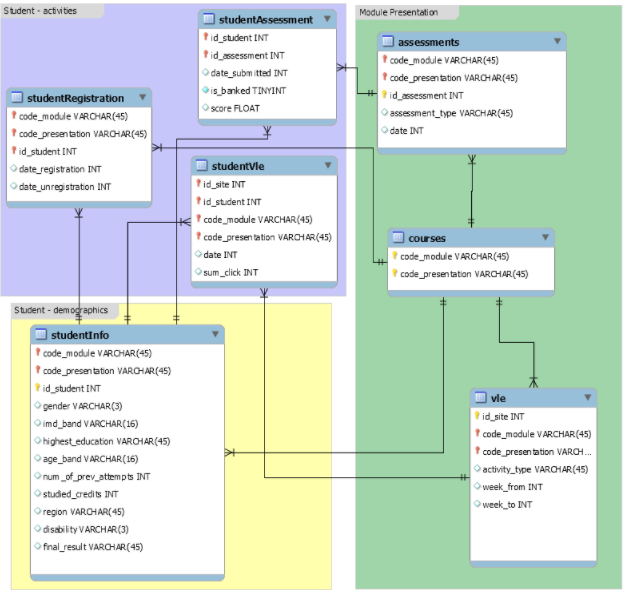


Comme on peut le voir, il existe de nombreux types de données différents, mais puisque nous voulons faire des prédictions sur les performances des élèves, il serait intéressant d'avoir :

* Une mesure de l'engagement des étudiants envers le cours tout au long de la période

* Une mesure de leur performance sur la période

* Leurs notes finales, car elles constituent une part importante de la composition de la note finale

En allant sur le site Web indiqué, nous pouvons voir que ces informations sont contenues dans les fichiers suivants :

- studentInfo.csv
- studentAssessment.csv
- assessments.csv
- studentVle.csv
- vle.csv

Ces fichiers seront nos sources de données pour le processus de construction du modèle

## 2. Formulation mathematique du probleme et de la solution

Soit X = {x1, x2, ..., xn} un ensemble de n exemples de données, et C = {c1, c2} un ensemble de 2 classes possibles. Le régresseur logistique modélise la probabilité p(ci | xi) que l'exemple xi appartienne à la classe ci en utilisant une fonction sigmoïde:

p(ci | xi) = σ(wT xi + b)

où w est un vecteur de poids, xi est l'exemple de données, b est un biais, et σ est la fonction sigmoïde donnée par:

σ(z) = 1 / (1 + exp(-z))


<font color=orange >Les paramettres :</font><br>
- Poids
- Biais

<font color=orange >Les Hyper-paramettres :</font><br>
- Taux d'apprentissage
- Nombre d'époch
- Méthode de régularisation

<font color=orange >Critere et approche d'optimisation :</font><br>
Le critère d'optimisation de la régression logistique est généralement la minimisation de la fonction de coût ou de perte du modèle.
Voici une formulation mathématique de la fonction de coût couramment utilisée pour la régression logistique, qui est l'entropie croisée:

J(y, ŷ) = - ∑i=1..n ∑j=1..k yij log(ŷij)


# 3. Developpement du model

In [1]:
# Importation
import numpy as np
import pandas as pd

# Les donnees d'entree sont dans le repertoire courant
import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./anonymisedData.zip
./MIMIC_Extract-master.zip
./predict-los-in-hospital-using-lstm-cnn-mimic3d.ipynb
./student-performance-prediction-complete-analysis - Copie.ipynb
./tp1_score_eleve.ipynb
./anonymiseddata\assessments.csv
./anonymiseddata\courses.csv
./anonymiseddata\studentAssessment.csv
./anonymiseddata\studentInfo.csv
./anonymiseddata\studentRegistration.csv
./anonymiseddata\studentVle.csv
./anonymiseddata\vle.csv
./MIMIC\.gitignore
./MIMIC\datapackage_io_util.py
./MIMIC\heuristic_sentence_splitter.py
./MIMIC\LICENSE
./MIMIC\mimic_direct_extract.py
./MIMIC\mimic_extract_env_py36.yml
./MIMIC\mimic_querier.py
./MIMIC\README.md
./MIMIC\data\.gitignore
./MIMIC\notebooks\.gitignore
./MIMIC\notebooks\Baselines for Intervention Prediction - Mechanical Ventilation.ipynb
./MIMIC\notebooks\Baselines for Intervention Prediction - Vasopressor.ipynb
./MIMIC\notebooks\Baselines for Mortality and LOS prediction - GRU-D.ipynb
./MIMIC\notebooks\Baselines for Mortality and LOS prediction - Sklearn

In [3]:
# Lecture de nos données apartir des fichiers CSV sachant que ces fichiers se trouve 
# dans le dossier "anonymiseddata" qui a son tour se trouve dans notre repertoir courant
studentInfo=pd.read_csv("./anonymiseddata/studentInfo.csv")
evaluations=pd.read_csv("./anonymiseddata/assessments.csv")
evalStudent=pd.read_csv("./anonymiseddata/studentAssessment.csv")
studentVle=pd.read_csv("./anonymiseddata/studentVle.csv")
vle=pd.read_csv("./anonymiseddata/vle.csv")


# Partie 1 : Description

Ici, nous discuterons de la manière dont nous avons utilisé les données fournies afin de créer des fonctionnalités qui avaient du sens afin de construire le modèle.

# Evaluations

La performance à chaque évaluation est un bon indicateur de la connaissance du cours par les étudiants et, comme elle compose la note de l'évaluation finale, il est intéressant de l'intégrer dans la maquette finale. Mais, comme il existe de nombreux cours différents, chacun avec une structure différente, il est impossible de créer une fonctionnalité pour chaque évaluation. Afin d'inclure les évaluations, nous allons construire 2 fonctionnalités : L'une d'elles est la note finale donnée par le score et le poids de chaque évaluation. L'autre est un taux de réussite, créé en partant du principe qu'un étudiant doit obtenir au moins 40 % de notes à une évaluation pour la réussir, en calculant le pourcentage d'évaluations que l'étudiant a réussi avec succès. Nous séparerons également les examens finaux des autres évaluations, étant donné leur statut et la participation à l'évaluation finale est différente des autres évaluations.

In [54]:

examens=evaluations[evaluations["assessment_type"]=="Exam"]
autres=evaluations[evaluations["assessment_type"]!="Exam"]
nombres=autres.groupby(["code_module","code_presentation"]).count()["id_assessment"] 
nombres=nombres.reset_index()
print((nombres))
#Nous avons ici le nombre total d'évaluations par module

   code_module code_presentation  id_assessment
0          AAA             2013J              5
1          AAA             2014J              5
2          BBB             2013B             11
3          BBB             2013J             11
4          BBB             2014B             11
5          BBB             2014J              5
6          CCC             2014B              8
7          CCC             2014J              8
8          DDD             2013B             13
9          DDD             2013J              6
10         DDD             2014B              6
11         DDD             2014J              6
12         EEE             2013J              4
13         EEE             2014B              4
14         EEE             2014J              4
15         FFF             2013B             12
16         FFF             2013J             12
17         FFF             2014B             12
18         FFF             2014J             12
19         GGG             2013J        

In [48]:
# print(evalStudent)
#Fonction pour déterminer si un étudiant a réussi une évaluation donnée ou non
def reussi_echec(note):
    if note>=40:
        return True
    else:
        return False
#Création du Dataframe student_eval pour joindre des informations sur les poids d'évaluation et leurs notes respectives
stud_eval =pd.merge(evalStudent,autres,how="inner",on=["id_assessment"])
stud_eval["pass"]=stud_eval["score"].apply(reussi_echec)
stud_eval["weighted_grade"]=stud_eval["score"]*stud_eval["weight"]/100
print(stud_eval)

        id_assessment  id_student  date_submitted  is_banked  score  \
0                1752       11391              18          0   78.0   
1                1752       28400              22          0   70.0   
2                1752       31604              17          0   72.0   
3                1752       32885              26          0   69.0   
4                1752       38053              19          0   79.0   
...               ...         ...             ...        ...    ...   
168948          37443      527538             227          0   60.0   
168949          37443      534672             229          0  100.0   
168950          37443      546286             215          0   80.0   
168951          37443      546724             230          0  100.0   
168952          37443      558486             224          0   80.0   

       code_module code_presentation assessment_type   date  weight  pass  \
0              AAA             2013J             TMA   19.0    10.0  T

In [6]:
#Moyenne de l'évaluation finale par étudiant et par module
avg=stud_eval.groupby(["id_student","code_module","code_presentation"]).sum()["weighted_grade"].reset_index()
avg.head()

,id_student,code_module,code_presentation,weighted_grade
0,6516,AAA,2014J,63.50
1,8462,DDD,2013J,34.90
2,8462,DDD,2014J,43.00
3,11391,AAA,2013J,82.40
4,23629,BBB,2013B,16.69


In [55]:
# print(nombres)
#Taux de réussite par étudiant par module
taux_reussite=pd.merge((stud_eval[stud_eval["pass"]==True].groupby(["id_student","code_module","code_presentation"]).count()["pass"]).reset_index(),nombres,how="left",on=["code_module","code_presentation"])
taux_reussite["taux_reussite"]=taux_reussite["pass"]/taux_reussite["id_assessment"]
taux_reussite.drop(["pass","id_assessment"], axis=1,inplace=True)
taux_reussite.head()

,id_student,code_module,code_presentation,taux_reussite
0,6516,AAA,2014J,1.000000
1,8462,DDD,2013J,0.500000
2,8462,DDD,2014J,0.666667
3,11391,AAA,2013J,1.000000
4,23629,BBB,2013B,0.363636


In [8]:
#Résultats de l'examen final

stud_exams=pd.merge(evalStudent,examens,how="inner",on=["id_assessment"])
# print(stud_exams)

stud_exams["examen_score"]=stud_exams["score"]
stud_exams.drop(["id_assessment","date_submitted","is_banked", "score","assessment_type","date","weight"],axis=1,inplace=True)
stud_exams.head()

,id_student,code_module,code_presentation,examen_score
0,558914,CCC,2014B,32.0
1,559706,CCC,2014B,78.0
2,559770,CCC,2014B,54.0
3,560114,CCC,2014B,64.0
4,560311,CCC,2014B,100.0


# VLE (Virtual Learning Environment) 

Les ensembles de données se référant au VLE (Virtual Learning Environment) contiennent le flux d'interaction des étudiants avec le contenu disponible pour référence pendant toute la durée de la période. À partir de ces données, nous pouvons déduire à quel point un étudiant était en contact avec son sujet, s'il l'a étudié sur une base solide et comment il a utilisé le contenu.

In [9]:
vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [10]:
vle[~vle["week_from"].isna()]

#Seulement 1121 des 6364 entrées ont la semaine de référence pour les matériaux (la semaine où ils seraient utilisés en cours.)
#Avec cela à l'esprit, la construction d'une métrique pour suivre l'engagement d'étude devient irréalisable

,id_site,code_module,code_presentation,activity_type,week_from,week_to
113,546732,AAA,2013J,oucontent,2.0,2.0
198,546719,AAA,2013J,oucontent,1.0,1.0
210,546681,AAA,2013J,oucontent,1.0,1.0
264,877040,AAA,2014J,oucontent,2.0,2.0
323,877045,AAA,2014J,oucontent,1.0,1.0
...,...,...,...,...,...,...
6243,798728,GGG,2014B,resource,1.0,1.0
6266,897051,GGG,2014J,resource,2.0,2.0
6285,897121,GGG,2014J,resource,1.0,1.0
6304,897050,GGG,2014J,resource,1.0,1.0


In [11]:
studentVle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [12]:
#Ici, nous pouvons suivre le temps moyen après le début du cours que l'étudiant a pris pour utiliser le matériel 
# et le nombre moyen de clics par matériel
moy_par_site=studentVle.groupby(["id_student","id_site","code_module","code_presentation"]).mean().reset_index()
moy_par_site.head()

,id_student,id_site,code_module,code_presentation,date,sum_click
0,6516,877011,AAA,2014J,210.333333,3.833333
1,6516,877012,AAA,2014J,90.833333,2.310606
2,6516,877015,AAA,2014J,113.461538,2.000000
3,6516,877023,AAA,2014J,122.666667,2.000000
4,6516,877025,AAA,2014J,41.142857,4.333333


In [13]:
#Moyenne générale par étudiant par module
moy_par_student=moy_par_site.groupby(["id_student","code_module","code_presentation"]).mean()[["date","sum_click"]].reset_index()
moy_par_student.head()

,id_student,code_module,code_presentation,date,sum_click
0,6516,AAA,2014J,105.292573,5.816135
1,8462,DDD,2013J,38.794704,1.734524
2,8462,DDD,2014J,10.000000,3.000000
3,11391,AAA,2013J,111.739069,4.231515
4,23629,BBB,2013B,33.409632,2.817316


# StudentInfo

La table studentInfo contient diverses informations sur les étudiants, mais celles qui sont pertinentes pour cette analyse sont :

* Le nombre de fois que l'étudiant a déjà essayé de terminer le module
* Le résultat final des étudiants

La dernière est notre variable d'intérêt lorsque nous construisons notre modèle de prédiction

In [14]:
#Suppression des cas où l'étudiant a retiré son inscription au module
studentInfo=studentInfo[studentInfo["final_result"]!="Withdrawn"]
studentInfo=studentInfo[["code_module","code_presentation","id_student","num_of_prev_attempts","final_result"]]
studentInfo.head()

,code_module,code_presentation,id_student,num_of_prev_attempts,final_result
0,AAA,2013J,11391,0,Pass
1,AAA,2013J,28400,0,Pass
3,AAA,2013J,31604,0,Pass
4,AAA,2013J,32885,0,Pass
5,AAA,2013J,38053,0,Pass


# Compilation de tous les donnees pertinents

In [15]:
df_1=pd.merge(avg,taux_reussite,how="inner",on=["id_student","code_module","code_presentation"])
evaluation_info=pd.merge(df_1, stud_exams, how="inner", on=["id_student","code_module","code_presentation"])
evaluation_info.head()

,id_student,code_module,code_presentation,weighted_grade,taux_reussite,examen_score
0,23698,CCC,2014J,69.97,1.000000,80.0
1,24213,DDD,2014B,78.40,1.000000,58.0
2,27116,CCC,2014J,92.02,1.000000,96.0
3,28046,DDD,2013J,49.90,0.833333,40.0
4,28787,CCC,2014J,11.98,0.375000,44.0


In [16]:
df_2=pd.merge(studentInfo,evaluation_info,how="inner",on=["id_student","code_module","code_presentation"])
final_df=pd.merge(df_2,moy_par_student,how="inner", on=["id_student","code_module","code_presentation"])
final_df.drop(["id_student","code_module","code_presentation"],axis=1,inplace=True)
final_df.head()
#Le Dataframe final ne contient que des informations pertinentes pour le problème

,num_of_prev_attempts,final_result,weighted_grade,taux_reussite,examen_score,date,sum_click
0,0,Distinction,89.65,1.000,94.0,103.457907,2.706754
1,0,Pass,84.58,1.000,76.0,87.617265,1.539047
2,0,Pass,51.44,0.625,66.0,49.181286,1.562619
3,0,Pass,75.13,1.000,50.0,118.698642,2.189217
4,0,Distinction,93.22,1.000,98.0,75.791987,2.100617


# Part 2: Analyse Exploratoire de Données

Nous commençons l'analyse exploratoire des données en vérifiant l'intégrité du Dataframe

In [17]:
final_df.describe()

,num_of_prev_attempts,weighted_grade,taux_reussite,examen_score,date,sum_click
count,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000
mean,0.118586,66.280909,0.868616,65.604444,101.047138,2.016114
std,0.395313,21.221975,0.182934,20.564815,24.917830,0.722249
min,0.000000,1.120000,0.125000,0.000000,17.566546,1.000000
25%,0.000000,51.512500,0.769231,51.000000,84.681549,1.545160
50%,0.000000,69.760000,1.000000,67.000000,99.934672,1.802246
75%,0.000000,83.622500,1.000000,82.000000,116.635412,2.279943
max,5.000000,100.000000,1.000000,100.000000,237.035714,13.134308


In [18]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4950 entries, 0 to 4949
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   num_of_prev_attempts  4950 non-null   int64  
 1   final_result          4950 non-null   object 
 2   weighted_grade        4950 non-null   float64
 3   taux_reussite         4950 non-null   float64
 4   examen_score          4950 non-null   float64
 5   date                  4950 non-null   float64
 6   sum_click             4950 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 309.4+ KB


### Matrice de correlation

<AxesSubplot:>

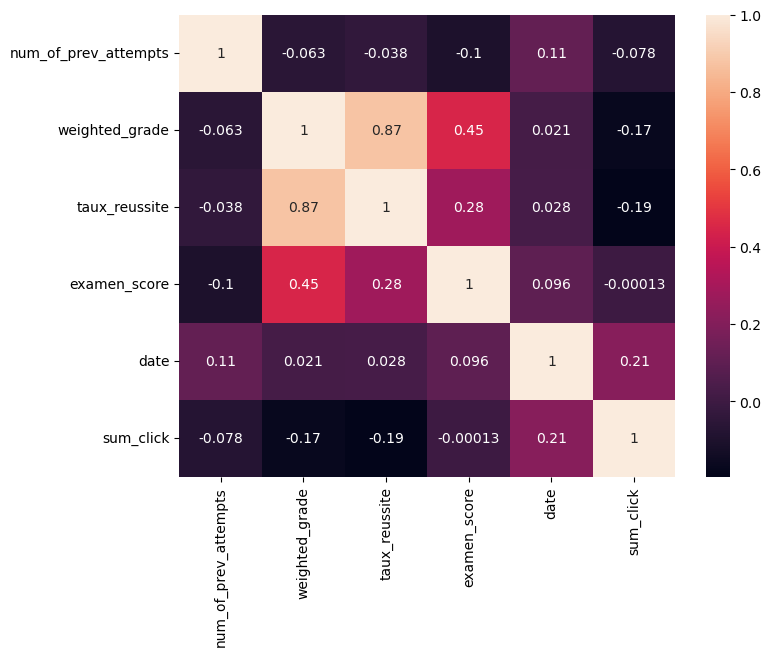

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(final_df.corr(),annot=True)

<AxesSubplot:xlabel='final_result', ylabel='count'>

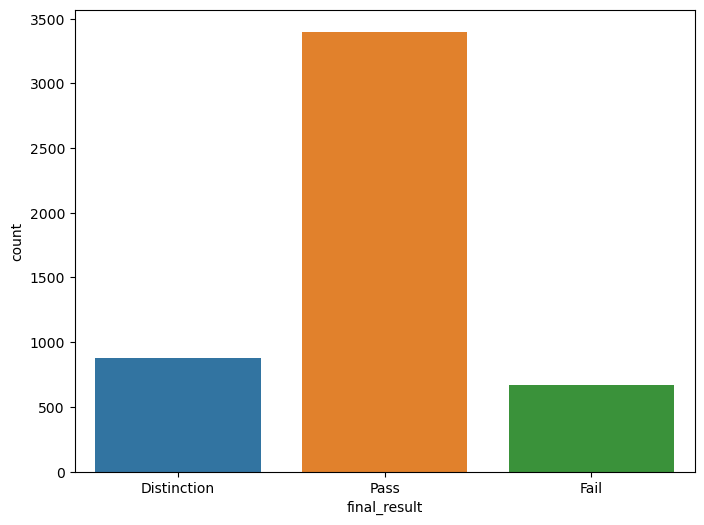

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(data=final_df, x="final_result")

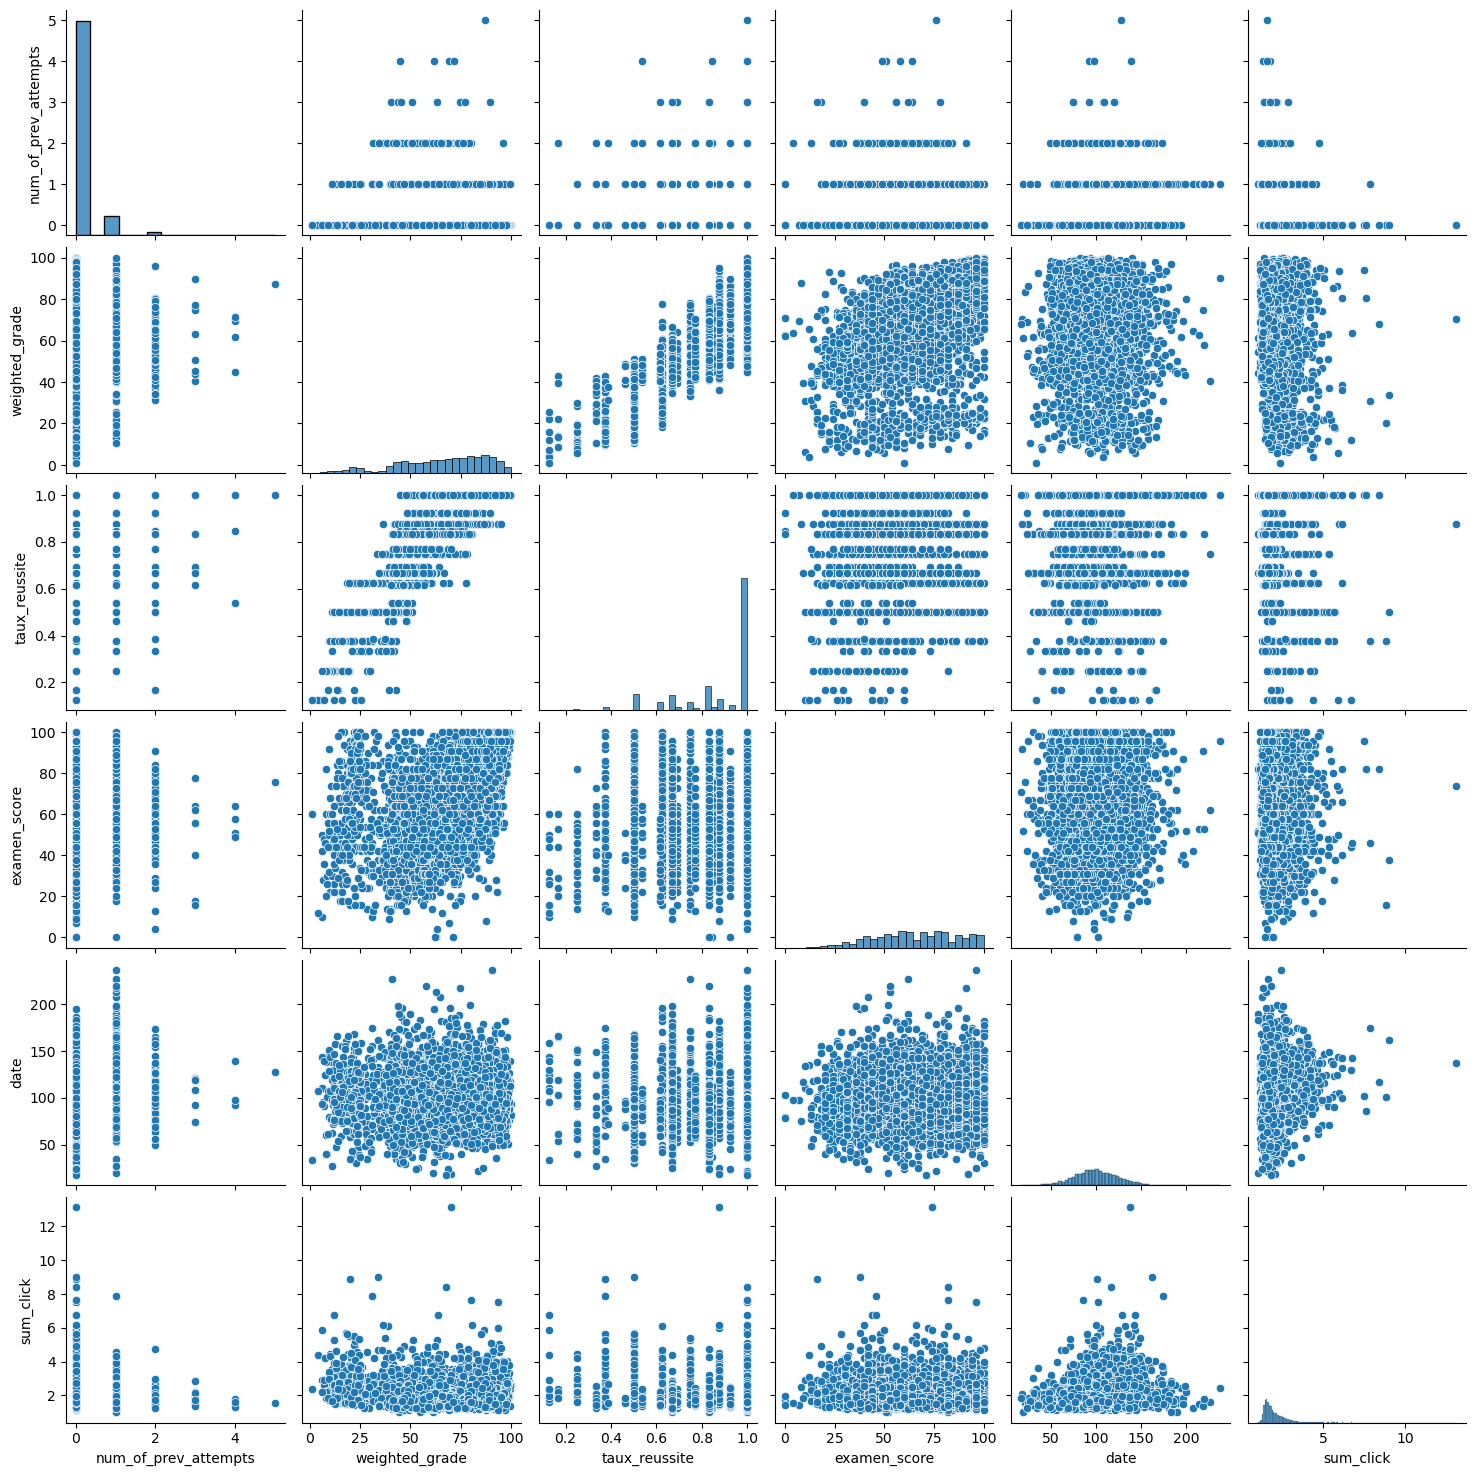

In [21]:
sns.pairplot(final_df )

#### Sur le pairplot, nous pouvons détecter deux valeurs aberrantes : une avec un sum_click (nombre de clics moyen) bien supérieur à la moyenne et une autre avec une seule num_of_prev_attempts (occurrence d'un nombre de tentatives précédentes). Afin de garder nos données aussi cohérentes que possible, ces cas seront supprimés

In [22]:
final_df[final_df["sum_click"]>13]

,num_of_prev_attempts,final_result,weighted_grade,taux_reussite,examen_score,date,sum_click
71,0,Pass,70.37,0.875,74.0,137.702513,13.134308


In [23]:
final_df[final_df["num_of_prev_attempts"]>4]

,num_of_prev_attempts,final_result,weighted_grade,taux_reussite,examen_score,date,sum_click
4908,5,Pass,87.3,1.0,76.0,127.634406,1.558457


In [24]:
final_df=final_df[final_df["sum_click"]<=10]
final_df=final_df[final_df["num_of_prev_attempts"]<=4]
final_df.head()

,num_of_prev_attempts,final_result,weighted_grade,taux_reussite,examen_score,date,sum_click
0,0,Distinction,89.65,1.000,94.0,103.457907,2.706754
1,0,Pass,84.58,1.000,76.0,87.617265,1.539047
2,0,Pass,51.44,0.625,66.0,49.181286,1.562619
3,0,Pass,75.13,1.000,50.0,118.698642,2.189217
4,0,Distinction,93.22,1.000,98.0,75.791987,2.100617


# Partie 3 : Modélisation

Pour l'étape de modélisation, nous utiliserons les techniques et modèles suivants :

* Cross Validation associée à des rapports de classification et à des matrices de confusion pour évaluer les performances du modèle
* Régression logistique
* Classificateur de réseau neuronal

In [25]:
# import des librairies necessaires
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
X=final_df.drop("final_result", axis=1)
y=final_df["final_result"]
#Partage des donnees en données d'entrainement et données de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Compte tenu de la forte corrélation entre *weighted_grade* et *taux_reussite*, les modèles seront adaptés à 3 types d'entrées : une avec les deux fonctionnalités et une avec chacune d'elles supprimée de l'ensemble de données

In [27]:
#1 contient les deux, 2 contient taux_reussite seulement et 3 contient weighted_grade seulement
X1_test=X_test
X1_train=X_train
X2_test=X_test.drop("weighted_grade",axis=1)
X2_train=X_train.drop("weighted_grade",axis=1)
X3_test=X_test.drop("taux_reussite",axis=1)
X3_train=X_train.drop("taux_reussite",axis=1)

In [28]:
# MinMaxScaler pour la mise en echel des données [0 - 1]
scaler1=MinMaxScaler()
scaler2=MinMaxScaler()
scaler3=MinMaxScaler()

In [29]:
#Mise en Echel de 
X1_train=scaler1.fit_transform(X1_train)
X1_test=scaler1.transform(X1_test)
X2_train=scaler2.fit_transform(X2_train)
X2_test=scaler2.transform(X2_test)
X3_train=scaler3.fit_transform(X3_train)
X3_test=scaler3.transform(X3_test)

# Model: Logistic Regression

In [30]:
lr1=LogisticRegression(max_iter=10000)
lr1.fit(X1_train,y_train)
result_lr1=lr1.predict(X1_test)
print(result_lr1)
print(confusion_matrix(y_test,result_lr1))
print("\n")
print(classification_report(y_test,result_lr1))

['Pass' 'Distinction' 'Distinction' ... 'Pass' 'Distinction' 'Pass']
[[203   0  72]
 [  0 125  61]
 [ 24  25 975]]


              precision    recall  f1-score   support

 Distinction       0.89      0.74      0.81       275
        Fail       0.83      0.67      0.74       186
        Pass       0.88      0.95      0.91      1024

    accuracy                           0.88      1485
   macro avg       0.87      0.79      0.82      1485
weighted avg       0.88      0.88      0.87      1485



In [31]:
lr2=LogisticRegression(max_iter=10000)
lr2.fit(X2_train,y_train)
result_lr2=lr2.predict(X2_test)
print(confusion_matrix(y_test,result_lr2))
print("\n")
print(classification_report(y_test,result_lr2))

[[199   0  76]
 [  0 124  62]
 [ 30  20 974]]


              precision    recall  f1-score   support

 Distinction       0.87      0.72      0.79       275
        Fail       0.86      0.67      0.75       186
        Pass       0.88      0.95      0.91      1024

    accuracy                           0.87      1485
   macro avg       0.87      0.78      0.82      1485
weighted avg       0.87      0.87      0.87      1485



In [32]:
lr3=LogisticRegression(max_iter=10000)
lr3.fit(X3_train,y_train)
result_lr3=lr3.predict(X3_test)
print(confusion_matrix(y_test,result_lr3))
print("\n")
print(classification_report(y_test,result_lr3))

[[203   0  72]
 [  0 123  63]
 [ 28  24 972]]


              precision    recall  f1-score   support

 Distinction       0.88      0.74      0.80       275
        Fail       0.84      0.66      0.74       186
        Pass       0.88      0.95      0.91      1024

    accuracy                           0.87      1485
   macro avg       0.86      0.78      0.82      1485
weighted avg       0.87      0.87      0.87      1485

